Dự đoán giá BTC

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
df = pd.read_csv('Bitcoin Historical Data.csv')
print(df)

           Date    Price     Open     High      Low    Vol.  Change
0      3/1/2013     34.5     33.4     34.9     32.9   39790    0.03
1      3/2/2013     34.3     34.5     34.8     33.2   36660   -0.01
2      3/3/2013     34.5     34.3     34.5     33.8   12530    0.01
3      3/4/2013     36.2     34.5     36.7     34.2   46770    0.05
4      3/5/2013     40.3     36.2     40.7     36.2   85430    0.12
...         ...      ...      ...      ...      ...     ...     ...
4014  2/26/2024  54495.1  51722.7  54899.1  50925.2   78050    0.05
4015  2/27/2024  57056.2  54491.1  57555.2  54464.0  100480    0.05
4016  2/28/2024  62467.6  57048.7  63915.3  56704.9  173640    0.09
4017  2/29/2024  61169.3  62467.1  63653.4  60512.5  119290   -0.02
4018   3/1/2024  62397.7  61157.3  63147.3  60790.9   74960    0.02

[4019 rows x 7 columns]


In [ ]:
# Convert the 'Date' column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [ ]:
# Identify features and target variables
features = ['Open', 'High', 'Low', 'Vol.']
target = 'Price'

Train-Test-Val Ratio: 7:2:1
Test RMSE: 14734.966571873143
Test MAE: 11376.949912826904
Test MAPE: 31.64
------------------------------


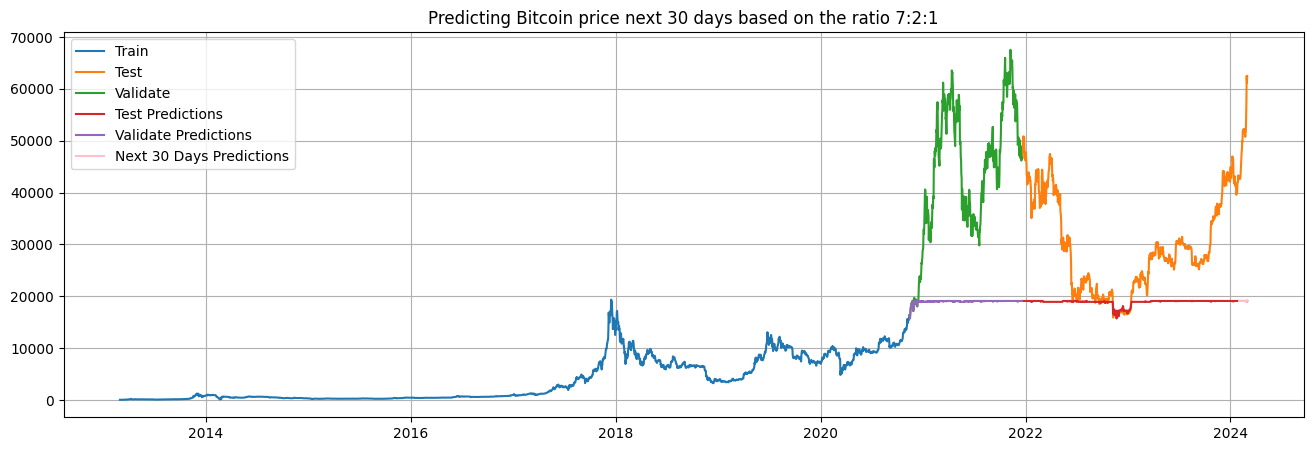

Train-Test-Val Ratio: 6:3:1
Test RMSE: 20228.289368805206
Test MAE: 15976.242418257267
Test MAPE: 38.43
------------------------------


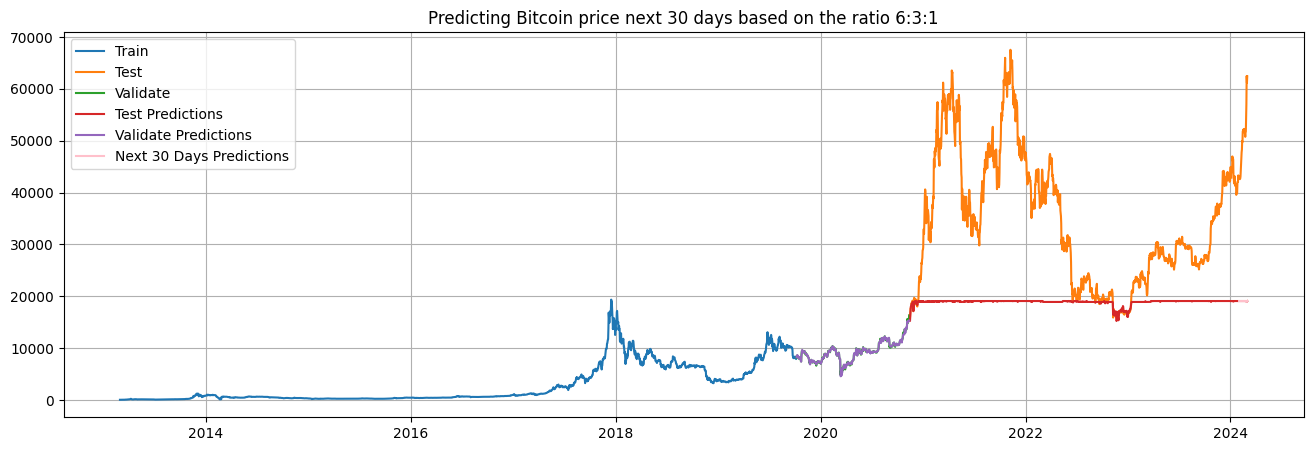

Train-Test-Val Ratio: 5:3:2
Test RMSE: 20289.93715711982
Test MAE: 16040.856639834034
Test MAPE: 38.62
------------------------------


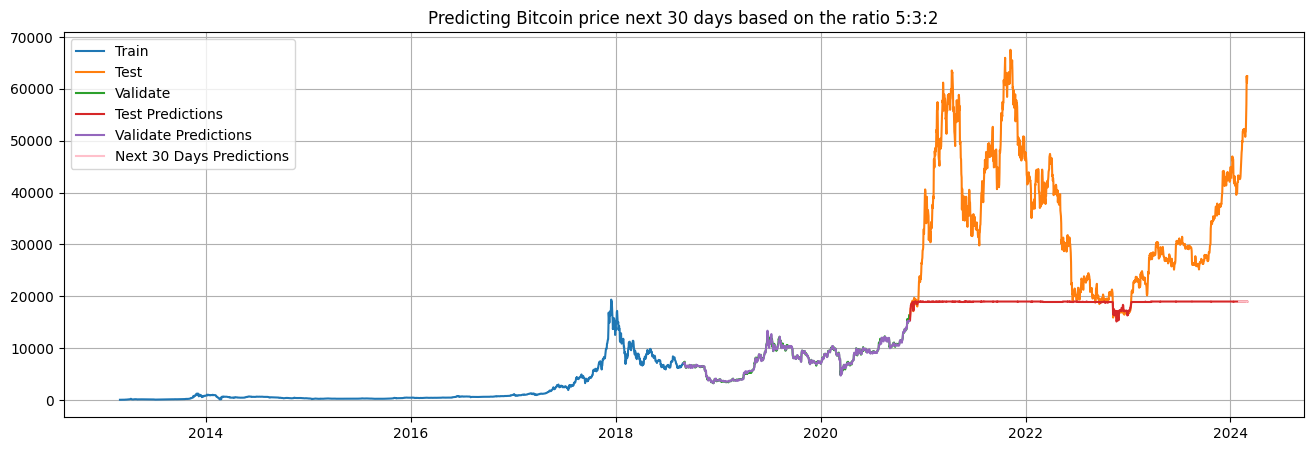

In [ ]:
import matplotlib.pyplot as plt
# Initialize lists to store predictions for each ratio
all_train_predictions = []
all_test_predictions = []
all_val_predictions = []

# Drawing plots for all three ratios
ratios = [(7, 2, 1), (6, 3, 1), (5, 3, 2)]

for train_ratio, test_ratio, val_ratio in ratios:
    # Split the data into training, testing, and validation sets
    train_size = int(len(df) * train_ratio / (train_ratio + test_ratio + val_ratio))
    test_size = int(len(df) * test_ratio / (train_ratio + test_ratio + val_ratio))

    train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)
    train_data, val_data = train_test_split(train_data, test_size=val_ratio / (train_ratio + val_ratio), shuffle=False)

    # Build a Random Forest model
    model = RandomForestRegressor()

    # Train the model
    model.fit(train_data[features], train_data[target])

    # Predict on the training, testing, and validation sets
    train_predictions = model.predict(train_data[features])
    test_predictions = model.predict(test_data[features])
    val_predictions = model.predict(val_data[features])

    # Save predictions for each ratio
    all_train_predictions.append(train_predictions)
    all_test_predictions.append(test_predictions)
    all_val_predictions.append(val_predictions)

    # Calculate evaluation metrics for the testing set
    test_rmse = np.sqrt(mean_squared_error(test_data[target], test_predictions))
    test_mae = mean_absolute_error(test_data[target], test_predictions)
    test_mape = np.mean(np.abs((test_data[target] - test_predictions) / test_data[target])) * 100

    # Calculate evaluation metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(train_data[target], train_predictions))
    train_mae = mean_absolute_error(train_data[target], train_predictions)
    train_mape = np.mean(np.abs((train_data[target] - train_predictions) / train_data[target])) * 100

    # Calculate evaluation metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(val_data[target], val_predictions))
    val_mae = mean_absolute_error(val_data[target], val_predictions)
    val_mape = np.mean(np.abs((val_data[target] - val_predictions) / val_data[target])) * 100

    # Print result for each ratio
    print(f'Train-Test-Val Ratio: {train_ratio}:{test_ratio}:{val_ratio}')
    print(f'Test RMSE: {test_rmse}')
    print(f'Test MAE: {test_mae}')
    print(f'Test MAPE: {test_mape:.2f}')
    print('-' * 30)

    # Plotting for each ratio
    last_data = df.index[-30:]
    y_pred_test = model.predict(df.loc[last_data][features])

    plt.figure(figsize=(16, 5))
    plt.title(f"Predicting Bitcoin price next 30 days based on the ratio {train_ratio}:{test_ratio}:{val_ratio}")
    plt.grid(True)
    plt.plot(train_data.index, train_data['Price'])
    plt.plot(test_data.index, test_data['Price'])
    plt.plot(val_data.index, val_data['Price'])
    plt.plot(test_data.index, test_predictions)
    plt.plot(val_data.index, val_predictions)
    plt.plot(last_data, y_pred_test, color="pink")
    plt.legend(['Train', 'Test', 'Validate', 'Test Predictions', 'Validate Predictions', 'Next 30 Days Predictions'])
    plt.show()